## <center> Análise da base de Alimentos Regularizados e Situação do Registro </center>

#### <center> 📈 Análise de Dados 📉

#### Importações

In [32]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### Consumindo a base vinda de um arquivo pickle

In [33]:
base = pickle.load(open('base_consumo', 'rb'))

display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
0,Austria,Adults,Alcoholic beverages,Alcoholic beverages,2123,7,303.3
1,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
2,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
3,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
4,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
...,...,...,...,...,...,...,...
307079,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307080,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307081,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307082,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5


In [34]:
base = base[~base['PopulationGroup'].isin(['Pregnant women', 'Lactating women'])].dropna()
display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
0,Austria,Adults,Alcoholic beverages,Alcoholic beverages,2123,7,303.3
1,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
2,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
3,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
4,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
...,...,...,...,...,...,...,...
307079,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307080,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307081,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307082,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5


#### Separando atributos e respostas

In [35]:
df_resposta = base['PopulationGroup']
df_atributos = base.drop(columns='PopulationGroup')

#### Transformando dados

In [36]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(df_resposta)

preprocessador = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)

x_enconded = preprocessador.fit_transform(df_atributos)

classifier = GaussianNB()

#### <center> Naive Bayes

#### Com Cross Val e OverSample

Melhor valor de k: 9
Cross-Validation Scores: [0.24532544 0.25140722 0.28811284 0.30726429 0.24204584 0.27845624
 0.27899002 0.28060754 0.26711742]
Mean Accuracy: 0.27103631562388597
Confusion Matrix:
[[ 1051  4461 18270  6785 17023     9 31888]
 [ 1068 30488  6023 16539 18438   162  6769]
 [  759   212 13339  5487  3877     9 55804]
 [   51 14400 12800  8444  2228    42 41522]
 [  659  2885 18701  4930 27218    54 25040]
 [   28  6195 16122  4628  4705     0 47809]
 [   18     0  8818     0   384     0 70267]]


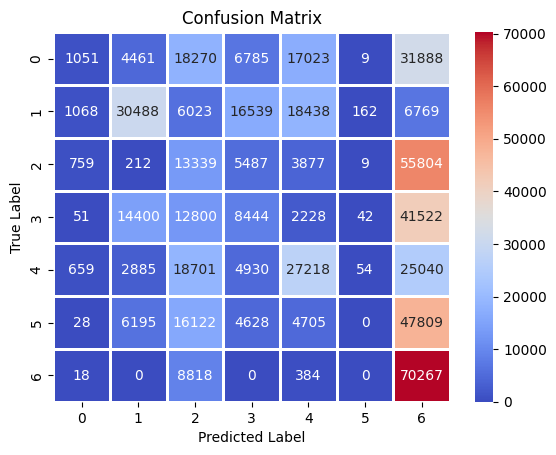

In [37]:
# Aplicar SMOTE
smote = SMOTE()
x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0
contador = 0

# Loop para encontrar o melhor valor de separação
for i in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

    contador = contador + 1

print(f"Melhor valor de k: {cv_final}")

# Ajustar valor de cv para algo razoável, como 5 ou 10
cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Usar y_transformed para a matriz de confusão
conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=cv_final))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Com Cross Val e UnderSample

50
Cross-Validation Scores: [0.11975664 0.298431   0.50528338 0.33205251 0.62600064 0.50848543
 0.42939481 0.26929235 0.53794428 0.18091579 0.38520653 0.6298431
 0.54723023 0.44700608 0.44092219 0.56900416 0.39865514 0.39545309
 0.16746718 0.54626961 0.48190842 0.62792187 0.34357989 0.46173551
 0.21165546 0.54772582 0.25752723 0.28859705 0.45675849 0.31037796
 0.62556054 0.52274183 0.3673927  0.3504164  0.49711723 0.11338885
 0.54484305 0.52466368 0.11883408 0.41127482 0.38500961 0.43369635
 0.62235746 0.50928892 0.32254965 0.35714286 0.51057015 0.11146701
 0.49391416 0.62331839]
Mean Accuracy: 0.4153589915739539
Confusion Matrix:
[[   32  1744  3173   119  2707     2  4996]
 [  150 43447  5408  3829 19884     0  6769]
 [   34   898  2103    53   695     8  8982]
 [    4  3655  1916    32   424     0  6742]
 [   23  1064  2991   158  4517     2  4018]
 [    0  1744  2636    22   734     0  7637]
 [    2     1  1336     0   102     0 11332]]


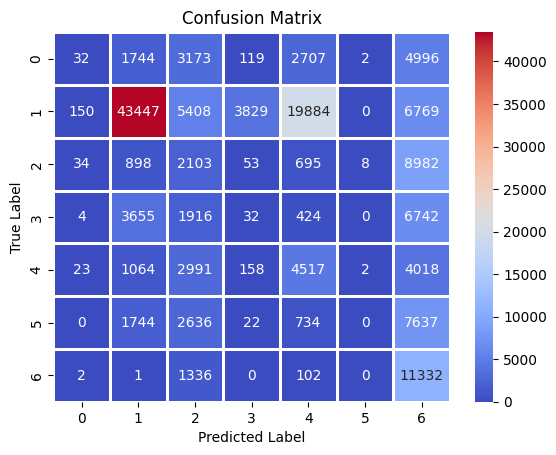

In [38]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='not majority')

# Realiza o undersampling
X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separações
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k
print(cv_final)

cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Sem CrossVal com UnderSample

              precision    recall  f1-score   support

           0       0.22      0.00      0.01      3170
           1       0.84      0.60      0.70     19811
           2       0.11      0.17      0.14      3229
           3       0.05      0.00      0.01      3136
           4       0.16      0.36      0.22      3255
           5       0.00      0.00      0.00      3213
           6       0.23      0.89      0.36      3218

    accuracy                           0.42     39032
   macro avg       0.23      0.29      0.20     39032
weighted avg       0.49      0.42      0.41     39032

Confusion Matrix:
[[    9   421   759    13   682     5  1281]
 [   23 11832  1329   107  4865     5  1650]
 [    0   230   552     7   185     2  2253]
 [    3   906   477    10    90     0  1650]
 [    5   267   729    43  1164     2  1045]
 [    0   433   680     9   183     0  1908]
 [    1     0   343     0    16     0  2858]]


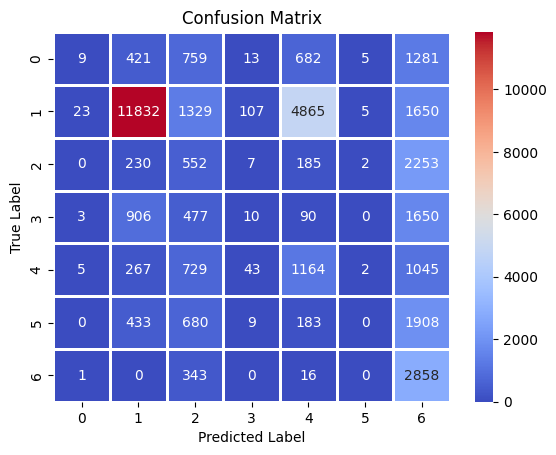

In [39]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'not majority')

X_resampled, y_X_resampled = rus.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_X_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Sem CrossVal com OverSample

C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.21      0.01      0.02     19849
           1       0.54      0.41      0.47     19886
           2       0.15      0.17      0.16     19924
           3       0.20      0.10      0.14     20010
           4       0.37      0.37      0.37     19849
           5       0.00      0.00      0.00     19802
           6       0.25      0.89      0.39     19783

    accuracy                           0.28    139103
   macro avg       0.24      0.28      0.22    139103
weighted avg       0.24      0.28      0.22    139103

Confusion Matrix:
[[ 1507  4520 18584  6423 15529   684 32240]
 [ 1042 30650  6031 16659 17921   378  6806]
 [  726   322 12418  5144  4370     0 56507]
 [   89 14305 12346  8557  2220    92 41878]
 [ 1629  2851 19238  4850 24271  1100 25548]
 [   48  6300 15756  4662  4804    18 47899]
 [   12     0  8660    69   651    14 70081]]


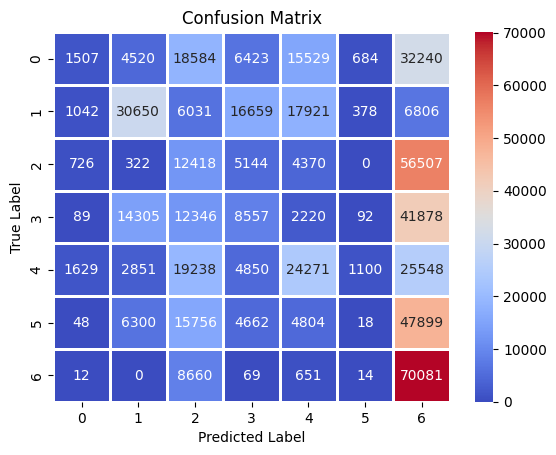

In [40]:
smote = SMOTE()

x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_transformed, y_transformed, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### PCA com atributos para Naive Bayes

In [41]:
pca = PCA(n_components=5)
pca.fit(x_enconded)

PCA(n_components=5)

In [42]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.91570898e-01 8.35088819e-03 7.16604084e-05 3.95657880e-06
 2.48811583e-06]
[1918503.01725812  176062.52861365   16309.48470525    3832.30892189
    3039.03637053]


#### Treinando modelo com as alterações do PCA e UnderSample

              precision    recall  f1-score   support

           0       0.28      0.05      0.08      3170
           1       0.82      0.62      0.70     19811
           2       0.09      0.15      0.11      3229
           3       0.00      0.00      0.00      3136
           4       0.15      0.27      0.20      3255
           5       0.09      0.00      0.01      3213
           6       0.23      0.88      0.36      3218

    accuracy                           0.43     39032
   macro avg       0.24      0.28      0.21     39032
weighted avg       0.48      0.43      0.42     39032

Confusion Matrix:
[[  158   636   791     0   349    10  1226]
 [  262 12281  1477     0  4133    59  1599]
 [    0   289   474     0    89    12  2365]
 [    0   935   476     0    76    13  1636]
 [  151   418   839     0   881     7   959]
 [    0   471   703     0   149    11  1879]
 [    0    23   337     0    17     9  2832]]


C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

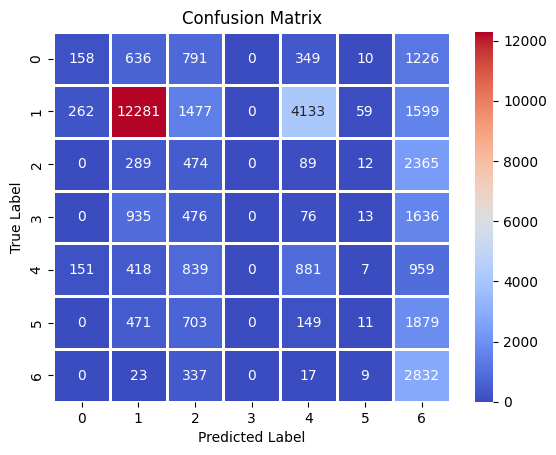

In [43]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Treinando modelo com as alterações do PCA, UnderSample e CrossVal

3
Cross-Validation Scores: [0.5103378  0.39422005 0.41104129]
Mean Accuracy: 0.4385330504931553
Confusion Matrix:
[[  558  2354  3156     4  1585    65  5051]
 [  740 48742  5957    28 17271   208  6541]
 [    0  1107  1887     4   389    47  9339]
 [    0  3832  2051     0   263    21  6606]
 [  447  1710  3256     5  3352    49  3954]
 [    3  1834  2865     1   571    62  7437]
 [    1    62  1365     0    94    46 11205]]


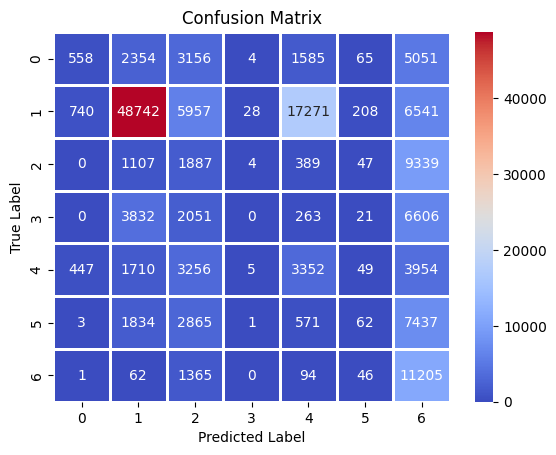

In [44]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separação
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, x_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

# Executa a validação cruzada com a melhor separação
cv_scores = cross_val_score(classifier, x_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, x_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Acabei não colocando o Grid, pois descobri os melhores valores manualmente

#### <center> KNN

#### KNN com menor K

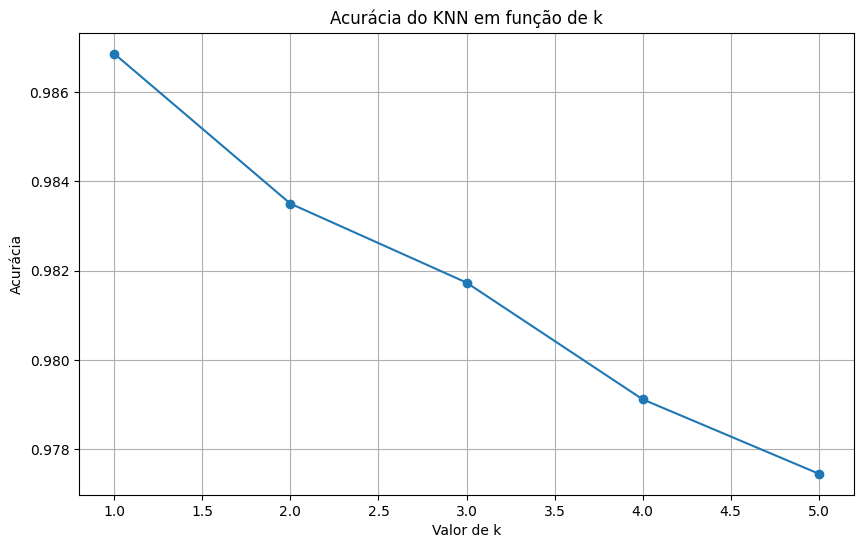

O melhor valor de k é: 5, com uma acurácia de: 0.9774543963927034


In [45]:
k_values = []
accuracies = []
maior_acuracia = 1
k_final = 0

for contador in range(5):
    k = 1 + contador
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    classificador_knn.fit(x_treino, y_treino)

    previsao_knn = classificador_knn.predict(x_teste)
    acuracia = accuracy_score(y_teste, previsao_knn)

    k_values.append(k)
    accuracies.append(acuracia)

    if acuracia < maior_acuracia:
        maior_acuracia = acuracia
        k_final = k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Acurácia do KNN em função de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

print(f"O melhor valor de k é: {k_final}, com uma acurácia de: {maior_acuracia}")


#### Criando um classificador com o K de valor mais baixo

In [46]:
classificador_knn = KNeighborsClassifier(n_neighbors=k_final)

#### Treinando com CrossVal

4
Cross-Validation Scores: [0.89285859 0.47388951 0.76745222 0.91419663]
Mean Accuracy: 0.7620992375684987
Confusion Matrix:
[[   32  1744  3173   119  2707     2  4996]
 [  150 43447  5408  3829 19884     0  6769]
 [   34   898  2103    53   695     8  8982]
 [    4  3655  1916    32   424     0  6742]
 [   23  1064  2991   158  4517     2  4018]
 [    0  1744  2636    22   734     0  7637]
 [    2     1  1336     0   102     0 11332]]


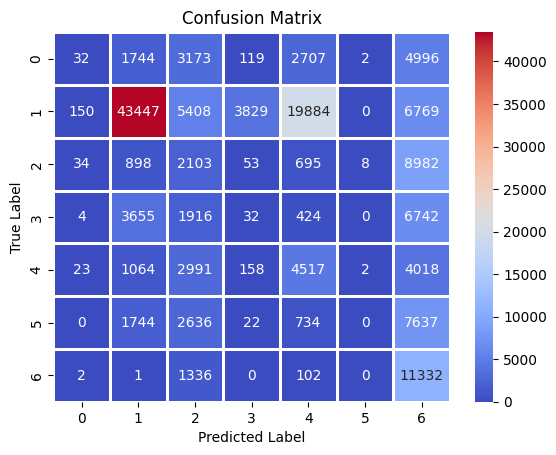

In [47]:

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0
    
# Loop para encontrar o melhor quantia de separações para o CrossVal
for contador in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Testando sem CrossVal

In [48]:
acuracia = accuracy_score( y_teste, previsao_knn)

print(acuracia)

matriz = confusion_matrix(y_teste, previsao_knn)
print(matriz)

0.9774543963927034
[[ 3034    34    41     9     2     9    41]
 [    0 19808     0     0     3     0     0]
 [   29     5  3059   113    16     5     2]
 [    0     5    30  3050     0    50     1]
 [   14   104    49    13  2978    30    67]
 [    1     8     1   120    10  3073     0]
 [   25     0     7    13    21     2  3150]]


Sem nenhuma outra alteração, o modelo se adequava muito ao treino :/

#### Tentando abaixar a acurácia com UnderSample

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1908
           1       0.99      0.97      0.98      1856
           2       0.96      0.96      0.96      1941
           3       0.92      0.96      0.94      1944
           4       0.97      0.95      0.96      1917
           5       0.96      0.95      0.96      1977
           6       0.97      0.99      0.98      1869

    accuracy                           0.96     13412
   macro avg       0.96      0.96      0.96     13412
weighted avg       0.96      0.96      0.96     13412

Confusion Matrix:
[[1844    2   19    7    1    8   27]
 [  17 1798    2    2   30    3    4]
 [  15    0 1855   56   12    2    1]
 [   0    1   21 1865    0   56    1]
 [  10   21   37    1 1815    8   25]
 [   6    1    2   82    0 1886    0]
 [  11    0    1    5   10    1 1841]]


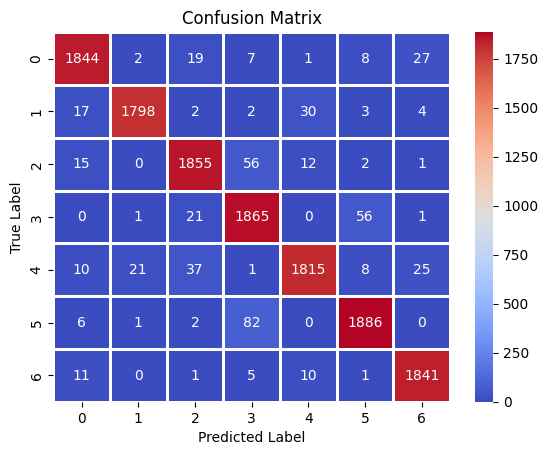

In [49]:
rus = RandomUnderSampler(random_state=0, sampling_strategy = 'auto')

X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=0)

treinandoKNN = classificador_knn.fit(x_treino, y_treino)

previsao = classificador_knn.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Tentando abaixar com OverSample e CrossVal

10
Cross-Validation Scores: [0.9163207  0.87935156 0.90796355 0.89047645 0.88474326 0.92764328
 0.89279488 0.92863176 0.93470642 0.90035945]
Mean Accuracy: 0.906299132581107
Confusion Matrix:
[[78802    28   156    69     1    25   406]
 [17371 29800  5457  7619 12314  6867    59]
 [   80     2 78704   550   117    20    14]
 [    0     0    39 78289     0  1156     3]
 [   44   337   575    31 77857   146   497]
 [   11     6     1  2610     4 76855     0]
 [   96     0     3     2    25     2 79359]]


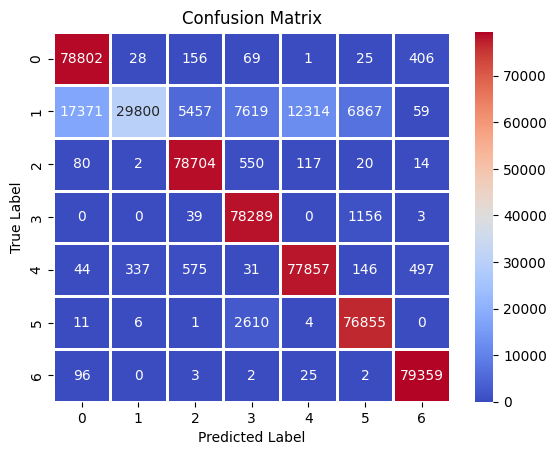

In [50]:
smote = SMOTE()

x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor separação de CrossVal
for contador in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classificador_knn, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### <center> Gini </center>

#### Antes de modificar os Hyperparams

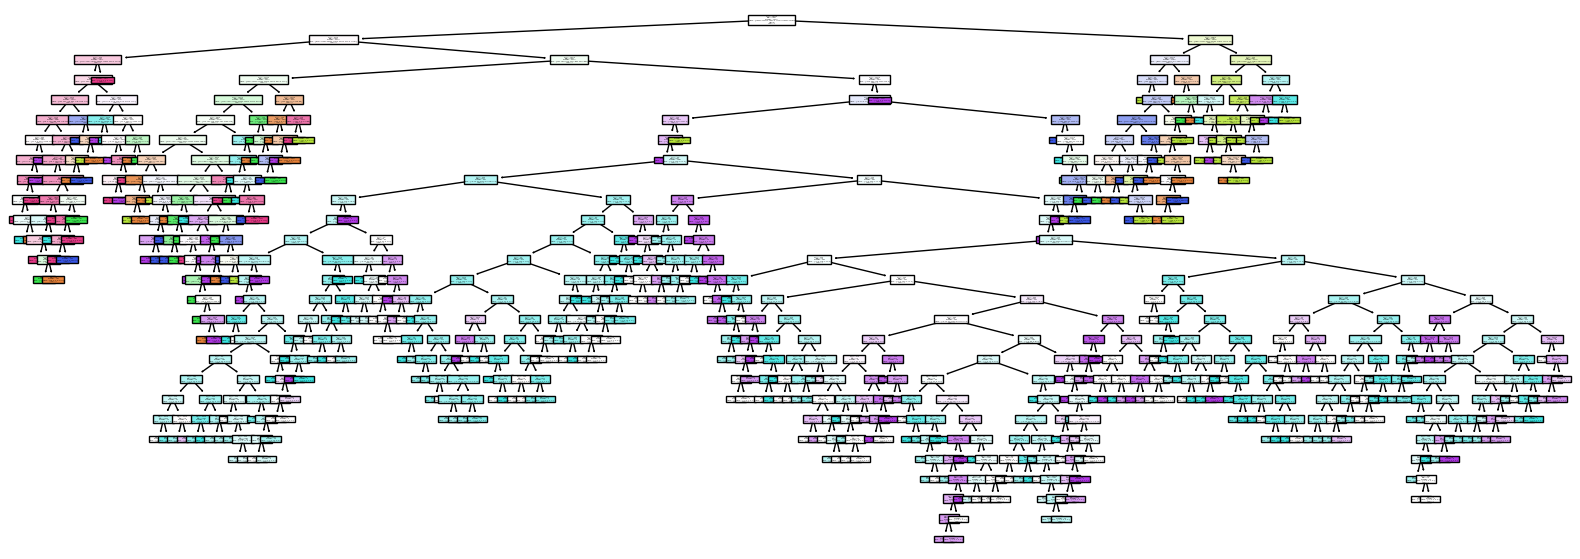

In [51]:
classificador_gini = tree.DecisionTreeClassifier(criterion='gini')
classificador_gini.fit(x_treino, y_treino)
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_gini, class_names=classificador_gini.classes_.astype(str), filled=True)
plt.show()

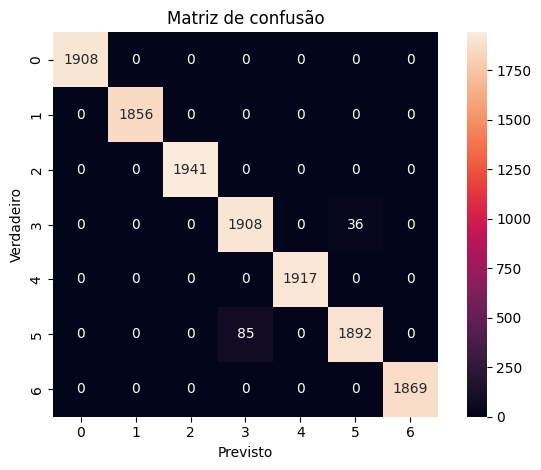

In [52]:
y_pred_gini = classificador_gini.predict(x_teste)

matriz_de_confusao = confusion_matrix(y_teste, y_pred_gini)

sns.heatmap(matriz_de_confusao, square=True, annot=True, fmt='d', cbar=True, yticklabels=classificador_gini.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [53]:
#profundidade da árvore
print('Profundidade gini:', classificador_gini.tree_.max_depth)
#quantidade de nós da árvore
print('Quantidade de nós gini: ', classificador_gini.tree_.node_count)

Profundidade gini: 26
Quantidade de nós gini:  769


### <center> Entropia </center>

#### Antes de modificar os Hyperparams

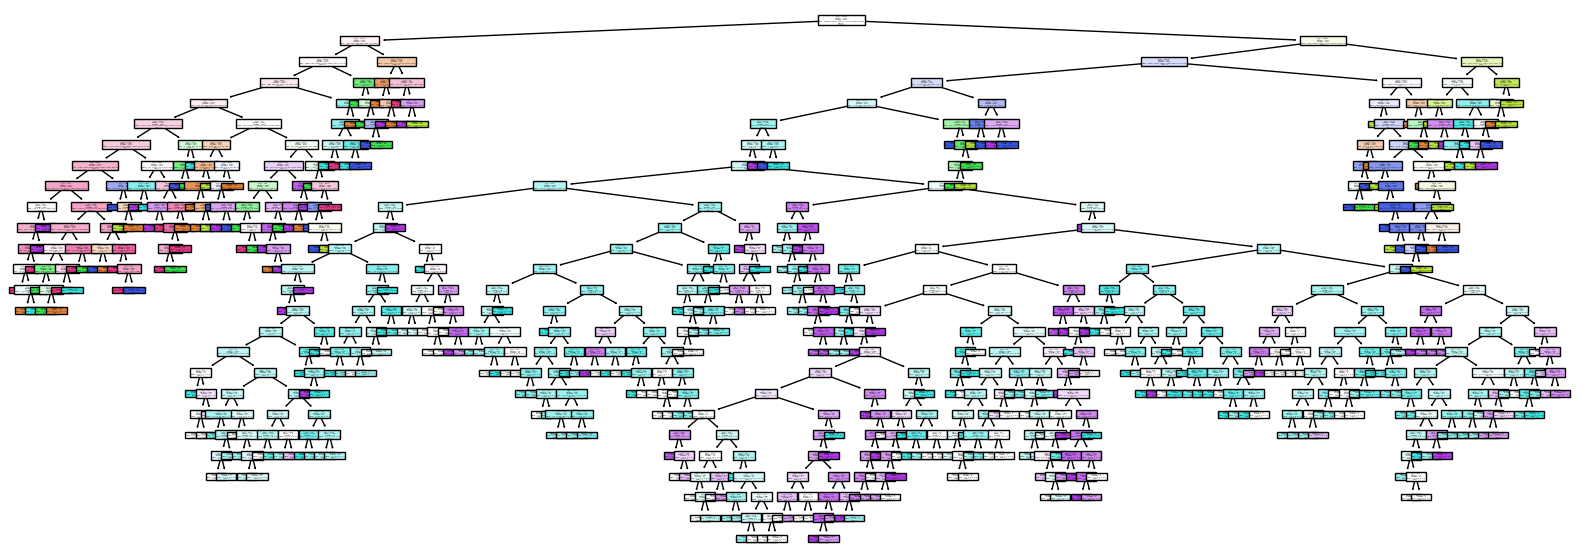

In [54]:
classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy')
classificador_entropy.fit(x_treino, y_treino)
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_entropy, class_names=classificador_entropy.classes_.astype(str), filled=True)
plt.show()

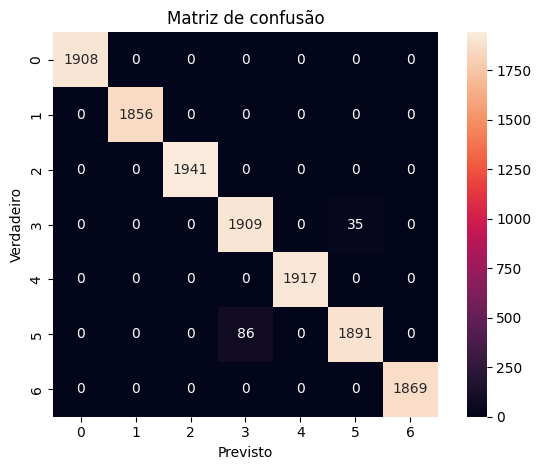

In [55]:
y_pred_entropy = classificador_entropy.predict(x_teste)

matriz_de_confusao_entropy = confusion_matrix(y_teste, y_pred_entropy)

sns.heatmap(matriz_de_confusao_entropy, square=True, annot=True, fmt='d', cbar=True, 
            yticklabels=classificador_entropy.classes_, 
            xticklabels=classificador_entropy.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [56]:
#profundidade da árvore
print('Profundidade entropy:', classificador_entropy.tree_.max_depth)
#quantidade de nós da árvore
print('Quantidade de nós entropy: ', classificador_entropy.tree_.node_count)

Profundidade entropy: 25
Quantidade de nós entropy:  763


In [57]:
previsao_entropy = classificador_entropy.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_entropy)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_entropy)
print(report)

Acurácia:  0.9909782284521325
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1908
           1       1.00      1.00      1.00      1856
           2       1.00      1.00      1.00      1941
           3       0.96      0.98      0.97      1944
           4       1.00      1.00      1.00      1917
           5       0.98      0.96      0.97      1977
           6       1.00      1.00      1.00      1869

    accuracy                           0.99     13412
   macro avg       0.99      0.99      0.99     13412
weighted avg       0.99      0.99      0.99     13412



#### <center> Depois de modificar os Hyperparams </center>

In [58]:
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5,10],
    'max_features': [None, 'sqrt', 'log2']
}

classificador_tree_gini = tree.DecisionTreeClassifier()

#criando o objeto
grid = GridSearchCV(estimator=classificador_tree_gini, param_grid=parametros, scoring='accuracy')
grid.fit(x_treino, y_treino)
print('Melhores hiperparametros: ', grid.best_params_)

Melhores hiperparametros:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}


In [59]:
melhor_classificador = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_leaf=10,
    min_samples_split=2,
    splitter='best'
)

melhor_classificador.fit(x_treino, y_treino)

DecisionTreeClassifier(min_samples_leaf=10)

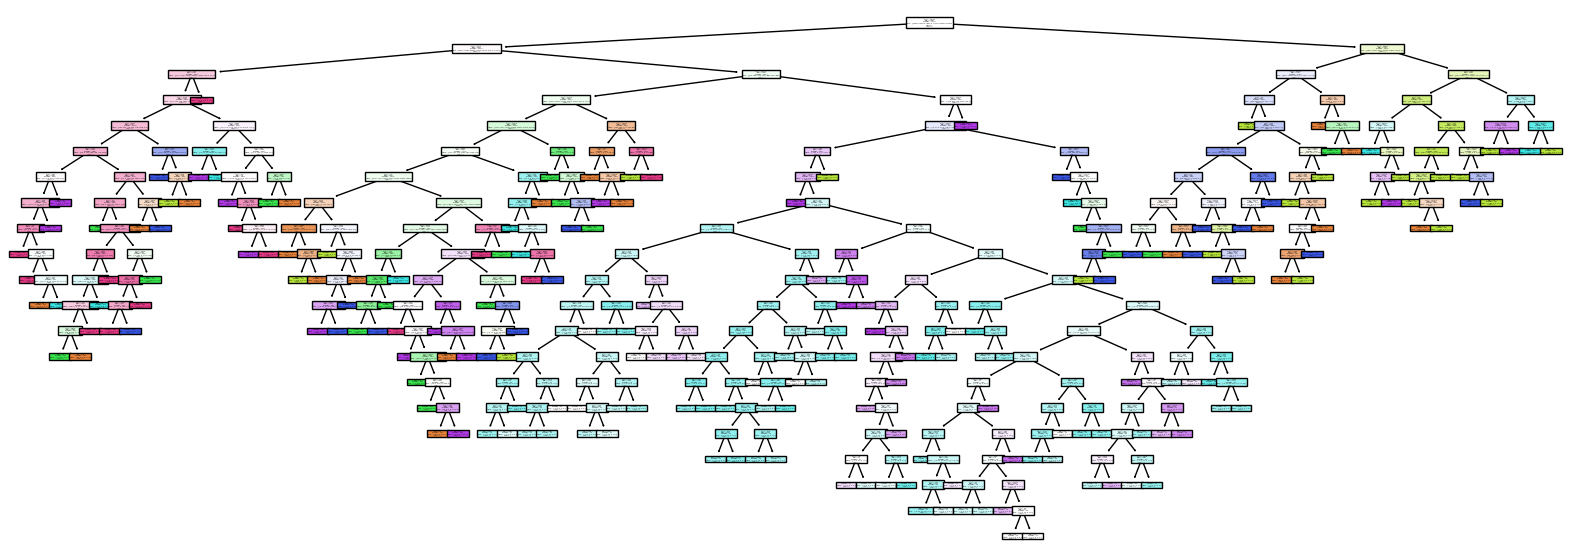

In [60]:
#Plotando a árvore depois de modificar os Hyperparams
plt.figure(figsize=(20,7))
tree.plot_tree(melhor_classificador, class_names=melhor_classificador.classes_.astype(str), filled=True)
plt.show()

In [61]:
#profundidade da árvore
print('Profundidade gini:', melhor_classificador.tree_.max_depth)
#quantidade de nós da árvore
print('Quantidade de nós gini: ', melhor_classificador.tree_.node_count)

Profundidade gini: 20
Quantidade de nós gini:  397


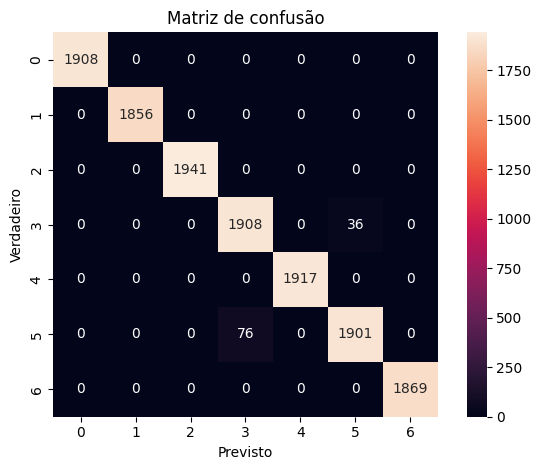

In [62]:
#Nova matriz de confusão
y_pred = melhor_classificador.predict(x_teste)

matriz_de_confusao_gini = confusion_matrix(y_teste, y_pred)

sns.heatmap(matriz_de_confusao_gini, square=True, annot=True, fmt='d', cbar=True, yticklabels=melhor_classificador.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [63]:
previsao_gini = melhor_classificador.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_gini)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_gini)
print(report)

Acurácia:  0.9916492693110647
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1908
           1       1.00      1.00      1.00      1856
           2       1.00      1.00      1.00      1941
           3       0.96      0.98      0.97      1944
           4       1.00      1.00      1.00      1917
           5       0.98      0.96      0.97      1977
           6       1.00      1.00      1.00      1869

    accuracy                           0.99     13412
   macro avg       0.99      0.99      0.99     13412
weighted avg       0.99      0.99      0.99     13412



In [64]:
predict_teste = classificador_gini.predict(x_treino)
print("Classificação:",predict_teste)
acuracia_teste = accuracy_score(y_treino, predict_teste)
print(acuracia_teste)

Classificação: [6 1 1 ... 3 3 5]
0.9946183502414505


In [65]:
# Avaliar usando cross-validation2
x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)
scores = cross_val_score(melhor_classificador, x_enconded, y_encoded, cv=5, scoring='accuracy')

# Resultados
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99679439 0.9926777  0.99169914 0.99691249 0.99679433]
Accuracy: 0.99 (+/- 0.00)


In [66]:
with open('melhor_modelo.pkl', mode = 'wb') as f:
    pickle.dump([melhor_classificador], f)